# Data Jobs Listings in Brazil - Glassdoor

## Exploratory Data Analysis

# Table of Contents

[1. Basic information](#1.-Basic-information)

[2. Libraries](#2.-Libraries)

[3. Data](#3.-Data)

* [3.1 Cleaning](#3.1-Cleaning)

[4. Basic statistics](#4.-Basic-statistics)

[5. Findings](#5.-Findings)

* [5.1 Employers](#5.1-Employers)

* [5.2 Word cloud](#5.2-Word-cloud)

[Appendix: variables](#Appendix:-variables)


## 1. Basic information
[Return to Table of Contents](#Table-of-Contents)

**Source:** https://www.kaggle.com/andresionek/data-jobs-listings-glassdoor

**Licence:** CC BY-NC-SA 4.0 (https://creativecommons.org/licenses/by-nc-sa/4.0/)

**Context:** The present dataset is the result of a selection of data that was restricted to data referring to Brazil. The selection took place over a scraping of data carried out on the Glassdoor website in which the search was restricted to the words:

* data-scientist

* software-engineer

* data-analyst

* research-scientist

* business-analyst

* product-manager

* project-manager

* data-engineer

* statistician

* dba

* database-engineer

* machine-learning-engineer

**Data collection date:** 10th of December 2019

**Data selection:** https://github.com/pathilink/Kaggle/blob/master/Data_Jobs_Listings_Glassdoor.ipynb

## 2. Libraries
[Return to Table of Contents](#Table-of-Contents)

In [5]:
# Install wordcloud to image reading
#!pip install wordcloud

In [6]:
import pandas as pd # dataframe
import numpy as np # list
from bs4 import BeautifulSoup # extract text
from os import path # system
from PIL import Image # image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # wordcloud
import matplotlib.pyplot as plt # visualization
#% matplotlib inline


## 3. Data
[Return to Table of Contents](#Table-of-Contents)

In [7]:
# Upload
data = pd.read_csv("data/glassdoor_br.csv", index_col=0)

In [8]:
# Display all columns
pd.set_option('max_columns', None)

# Display all rows
pd.set_option('max_rows', None)

# Display the entire column width 
#pd.set_option('max_colwidth', None)

# Display all values of an item
#pd.set_option('max_seq_item', None)

In [9]:
data.sample(5)

,benefits.benefitRatingDecimal,benefits.comments,benefits.highlights,benefits.numRatings,benefits.employerSummary,breadCrumbs,gaTrackerData.category,gaTrackerData.empId,gaTrackerData.empName,gaTrackerData.empSize,gaTrackerData.expired,gaTrackerData.industry,gaTrackerData.industryId,gaTrackerData.jobId.long,gaTrackerData.jobId.int,gaTrackerData.jobTitle,gaTrackerData.location,gaTrackerData.locationId,gaTrackerData.locationType,gaTrackerData.pageRequestGuid.guid,gaTrackerData.pageRequestGuid.guidValid,gaTrackerData.pageRequestGuid.part1,gaTrackerData.pageRequestGuid.part2,gaTrackerData.sector,gaTrackerData.sectorId,gaTrackerData.profileConversionTrackingParams.trackingCAT,gaTrackerData.profileConversionTrackingParams.trackingSRC,gaTrackerData.profileConversionTrackingParams.trackingXSP,gaTrackerData.jobViewTrackingResult.jobViewDisplayTimeMillis,gaTrackerData.jobViewTrackingResult.requiresTracking,gaTrackerData.jobViewTrackingResult.trackingUrl,header.adOrderId,header.advertiserType,header.applicationId,header.applyButtonDisabled,header.applyUrl,header.blur,header.coverPhoto,header.easyApply,header.employerId,header.employerName,header.expired,header.gocId,header.hideCEOInfo,header.jobTitle,header.locId,header.location,header.locationType,header.logo,header.logo2x,header.organic,header.overviewUrl,header.posted,header.rating,header.saved,header.savedJobId,header.sgocId,header.sponsored,header.userAdmin,header.uxApplyType,header.featuredVideo,header.normalizedJobTitle,header.urgencyLabel,header.urgencyLabelForMessage,header.urgencyMessage,header.needsCommission,header.payHigh,header.payLow,header.payMed,header.payPeriod,header.salaryHigh,header.salaryLow,header.salarySource,job.description,job.discoverDate,job.eolHashCode,job.importConfigId,job.jobReqId.long,job.jobReqId.int,job.jobSource,job.jobTitleId,job.listingId.long,job.listingId.int,map.country,map.employerName,map.lat,map.lng,map.location,map.address,map.postalCode,overview.allBenefitsLink,overview.allPhotosLink,overview.allReviewsLink,overview.allSalariesLink,overview.foundedYear,overview.hq,overview.industry,overview.industryId,overview.revenue,overview.sector,overview.sectorId,overview.size,overview.stock,overview.type,overview.description,overview.mission,overview.website,overview.allVideosLink,overview.competitors,overview.companyVideo,photos,rating.ceo.name,rating.ceo.photo,rating.ceo.photo2x,rating.ceo.ratingsCount,rating.ceoApproval,rating.recommendToFriend,rating.starRating,reviews,salary.country.cc3LetterISO,salary.country.ccISO,salary.country.continent.continentCode,salary.country.continent.continentName,salary.country.continent.id,salary.country.continent.new,salary.country.countryFIPS,salary.country.currency.currencyCode,salary.country.currency.defaultFractionDigits,salary.country.currency.displayName,salary.country.currency.id,salary.country.currency.name,salary.country.currency.negativeTemplate,salary.country.currency.new,salary.country.currency.positiveTemplate,salary.country.currency.symbol,salary.country.currencyCode,salary.country.defaultLocale,salary.country.defaultName,salary.country.defaultShortName,salary.country.employerSolutionsCountry,salary.country.id,salary.country.longName,salary.country.major,salary.country.name,salary.country.new,salary.country.population,salary.country.shortName,salary.country.tld,salary.country.type,salary.country.uniqueName,salary.country.usaCentricDisplayName,salary.currency.currencyCode,salary.currency.defaultFractionDigits,salary.currency.displayName,salary.currency.id,salary.currency.name,salary.currency.negativeTemplate,salary.currency.new,salary.currency.positiveTemplate,salary.currency.symbol,salary.lastSalaryDate,salary.salaries,wwfu
112334,4.618182,91844.0,91844.0,55,NaN,91845,-1,40772,Facebook,10000--1,False,Internet,200063,3.410530e+09,NaN,"Project Manager LATAM, Global Business Marketing",São Paulo,2479061,CITY,0000016e57ab8cf7bc2ca6be1de7a2c4,True,1573428890871,-4887348160128113980,Information Technology,1001

In [10]:
print('The data has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

The data has 1423 rows and 163 columns.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 375 to 164945
Columns: 163 entries, benefits.benefitRatingDecimal to wwfu
dtypes: bool(11), float64(39), int64(23), object(90)
memory usage: 1.7+ MB


In [12]:
data.columns.to_list()

['benefits.benefitRatingDecimal',
 'benefits.comments',
 'benefits.highlights',
 'benefits.numRatings',
 'benefits.employerSummary',
 'breadCrumbs',
 'gaTrackerData.category',
 'gaTrackerData.empId',
 'gaTrackerData.empName',
 'gaTrackerData.empSize',
 'gaTrackerData.expired',
 'gaTrackerData.industry',
 'gaTrackerData.industryId',
 'gaTrackerData.jobId.long',
 'gaTrackerData.jobId.int',
 'gaTrackerData.jobTitle',
 'gaTrackerData.location',
 'gaTrackerData.locationId',
 'gaTrackerData.locationType',
 'gaTrackerData.pageRequestGuid.guid',
 'gaTrackerData.pageRequestGuid.guidValid',
 'gaTrackerData.pageRequestGuid.part1',
 'gaTrackerData.pageRequestGuid.part2',
 'gaTrackerData.sector',
 'gaTrackerData.sectorId',
 'gaTrackerData.profileConversionTrackingParams.trackingCAT',
 'gaTrackerData.profileConversionTrackingParams.trackingSRC',
 'gaTrackerData.profileConversionTrackingParams.trackingXSP',
 'gaTrackerData.jobViewTrackingResult.jobViewDisplayTimeMillis',
 'gaTrackerData.jobViewTracki

In [13]:
# Missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
header.payHigh,1423,1.000000
header.normalizedJobTitle,1423,1.000000
job.listingId.int,1423,1.000000
gaTrackerData.jobId.int,1423,1.000000
header.salarySource,1423,1.000000
header.salaryLow,1423,1.000000
header.salaryHigh,1423,1.000000
header.payPeriod,1423,1.000000
header.payMed,1423,1.000000
header.payLow,1423,1.000000


In [14]:
# Number of distinct observations
data.nunique()

benefits.benefitRatingDecimal                                     82
benefits.comments                                               1423
benefits.highlights                                             1423
benefits.numRatings                                               52
benefits.employerSummary                                           7
breadCrumbs                                                     1423
gaTrackerData.category                                             2
gaTrackerData.empId                                              379
gaTrackerData.empName                                            374
gaTrackerData.empSize                                              8
gaTrackerData.expired                                              2
gaTrackerData.industry                                            52
gaTrackerData.industryId                                          53
gaTrackerData.jobId.long                                         976
gaTrackerData.jobId.int           

In [15]:
# Salary currency
data['salary.country.currency.name'].unique()

array(['United Kingdom Pound', nan], dtype=object)

### 3.1 Cleaning
[Return to Table of Contents](#Table-of-Contents)

In [16]:
# Delete columns with missing above 55%
data_c = data.loc[:, (data.isnull().sum(axis=0) <= 750)]
data_c.shape

(1423, 129)

In [17]:
# Delete columns with 0 or 1 distinct value
data_c = data_c.loc[:, (data_c.nunique(axis=0) > 1)]
data_c.shape

(1423, 79)

In [18]:
# Delete map.country used to select "Brazil"
data_c = data_c.drop(['map.country'], axis=1)
data_c.shape

(1423, 78)

In [19]:
# Delete non-relevant or repeated variables
data_c = data_c.drop(['benefits.benefitRatingDecimal', 'benefits.comments', 'benefits.highlights',
                      'benefits.numRatings', 'breadCrumbs', 'gaTrackerData.category', 'gaTrackerData.empId',
                      'gaTrackerData.empName', 'gaTrackerData.empSize', 'gaTrackerData.expired',
                      'gaTrackerData.industry', 'gaTrackerData.industryId', 'gaTrackerData.jobId.long',
                      'gaTrackerData.jobTitle', 'gaTrackerData.location', 'gaTrackerData.locationId',
                      'gaTrackerData.pageRequestGuid.guid', 'gaTrackerData.pageRequestGuid.part1',
                      'gaTrackerData.pageRequestGuid.part2', 'gaTrackerData.sector', 'gaTrackerData.sectorId',
                      'header.adOrderId', 'header.advertiserType', 'header.applyUrl', 'header.blur',
                      'header.coverPhoto', 'header.easyApply', 'header.employerId', 'header.expired',
                      'header.gocId', 'header.locId', 'header.locationType', 'header.logo', 'header.logo2x',
                      'header.organic', 'header.overviewUrl', 'job.discoverDate', 'job.eolHashCode',
                      'job.importConfigId', 'job.jobReqId.long', 'job.jobSource', 'job.jobTitleId',
                      'job.listingId.long', 'map.employerName', 'map.location', 'overview.allBenefitsLink',
                      'overview.allPhotosLink', 'overview.allReviewsLink', 'overview.allSalariesLink',
                      'overview.industryId', 'photos', 'rating.ceo.ratingsCount', 'salary.lastSalaryDate',], axis=1)

print('The new data has {} rows and {} columns.'.format(data_c.shape[0], data_c.shape[1]))

The new data has 1423 rows and 25 columns.


In [20]:
data_c.columns

Index(['header.employerName', 'header.jobTitle', 'header.location',
       'header.posted', 'header.rating', 'header.sponsored', 'job.description',
       'map.lat', 'map.lng', 'overview.foundedYear', 'overview.hq',
       'overview.industry', 'overview.revenue', 'overview.sector',
       'overview.sectorId', 'overview.size', 'overview.type',
       'overview.description', 'overview.website', 'rating.ceo.name',
       'rating.ceoApproval', 'rating.recommendToFriend', 'rating.starRating',
       'reviews', 'salary.salaries'],
      dtype='object')

### Text cleaning

In [21]:
def bs4_text(text):
    '''Remove HTML tags from a string'''
    soup = BeautifulSoup(text, "lxml")
    try:
        return soup.get_text()
    except AttributeError:
        return np.NaN    

In [22]:
def line_break(text):
    '''Remove line break'''
    try:
        return text.replace('\n', ' ')
    except AttributeError:
        return np.NaN

In [23]:
def end_line(text):
    '''Remove end of line'''
    try:
        return text.replace('\r\n', ' ')
    except AttributeError:
        return np.NaN

In [24]:
# Remove HTML tags
data_c['job.description'] = data_c['job.description'].map(bs4_text)

# Remove line break
data_c['job.description'] = data_c['job.description'].map(line_break)
data_c['overview.description'] = data_c['overview.description'].map(line_break)

# Remove end of line 
data_c['job.description'] = data_c['job.description'].map(end_line)
data_c['overview.description'] = data_c['overview.description'].map(end_line)

## 4. Basic statistics
[Return to Table of Contents](#Table-of-Contents)

In [25]:
data_c.describe()

,header.rating,map.lat,map.lng,overview.foundedYear,overview.sectorId,rating.ceoApproval,rating.recommendToFriend,rating.starRating,reviews,salary.salaries
count,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1293.000000,1293.000000,1293.000000,1423.000000,1293.000000
mean,3.410499,-21.186503,-42.431576,1388.488405,7282.529164,0.281756,0.738423,3.753395,82696.325369,74059.560712
std,1.397179,7.482478,13.572833,908.646149,4460.470639,0.847386,0.241936,0.927635,46841.511198,41649.157390
min,-0.100000,-32.033300,-62.900000,0.000000,0.000000,-1.000000,-0.100000,-0.100000,288.000000,249.000000
25%,3.400000,-23.533300,-46.616700,0.000000,0.000000,-1.000000,0.680000,3.600000,43272.500000,38804.000000
50%,3.800000,-23.533300,-46.616700,1984.000000,10013.000000,0.800000,0.780000,3.900000,82704.000000,74198.000000
75%,4.200000,-22.900000,-46.616700,2004.000000,10013.000000,0.920000,0.880000,4.200000,122879.500000,109699.000000
max,5.000000,0.000000,0.000000,2018.000000,10025.000000,1.000000,1.000000,5.000000,165183.000000,147052.000000


## 5. Findings
[Return to Table of Contents](#Table-of-Contents)

### 5.1 Employers
[Return to Table of Contents](#Table-of-Contents)

In [26]:
# Type of industry where jobs are concentrated
ind_type = data_c['overview.industry'].value_counts()
ind_type.head(10)

Internet                                   198
Computer Hardware & Software               152
Enterprise Software & Network Solutions    114
IT Services                                112
Healthcare Product Manufacturing            56
Consulting                                  55
Financial Transaction Processing            32
Advertising & Marketing                     29
Biotech & Pharmaceuticals                   21
Banks & Building Societies                  19
Name: overview.industry, dtype: int64

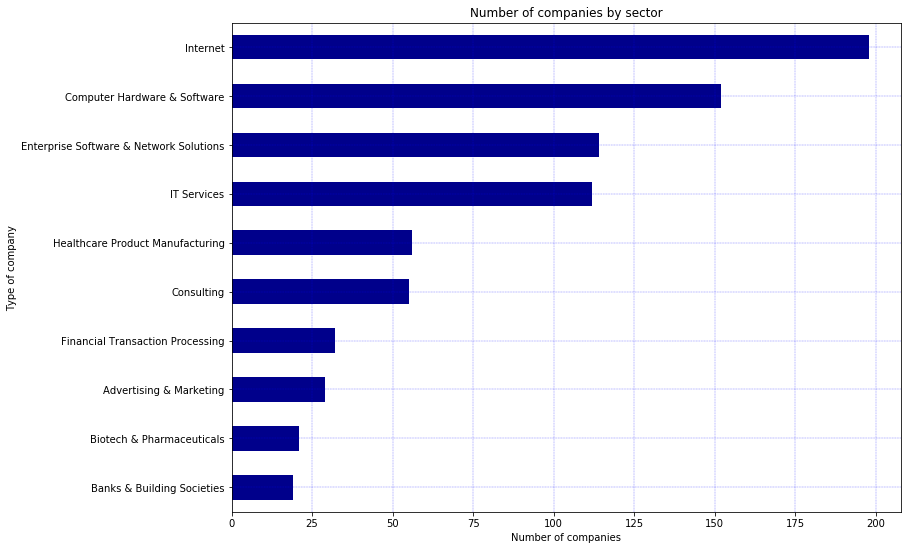

In [27]:
plt.figure(figsize=(12,9))
ind_type.head(10).sort_values(ascending=True).plot.barh(color ='darkblue', width = 0.5)
#plt.xticks(rotation=90)
plt.title("Number of companies by sector") 
plt.ylabel("Type of company")
plt.xlabel("Number of companies")
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

In [28]:
# Select information about employers
employer = data_c[['header.employerName', 'overview.industry', 'rating.starRating']]
employer.sample(5)

,header.employerName,overview.industry,rating.starRating
79173,RTB House,Enterprise Software & Network Solutions,4.3
144323,ViaSat,Telecommunications Services,4.4
71726,Poatek,IT Services,4.8
153279,Grupo Zap,Internet,4.3
45752,Facebook,Internet,4.3


In [29]:
# Groupby by overview.industry
industry = employer.groupby('overview.industry')
industry.mean().sort_values(by="rating.starRating",ascending=False).head(10)

,rating.starRating
overview.industry,
Audio/Visual,5.000000
Express Delivery Services,4.300000
Logistics & Supply Chain,4.233333
Car Hire,4.200000
Hotel & Resorts,4.200000
Banks & Building Societies,4.142105
Venture Capital & Private Equity,4.100000
Utilities,4.100000
Healthcare Product Manufacturing,4.067857


In [30]:
employer_ = data_c[['header.employerName', 'overview.industry', 'rating.starRating','salary.salaries']]
employer_.sample(5)

,header.employerName,overview.industry,rating.starRating,salary.salaries
124948,Dell,IT Services,4.0,40725.0
135139,Bayer,Biotech & Pharmaceuticals,4.2,44470.0
34831,iiGual inclusão & diversidade,NaN,-0.1,67427.0
146991,SumUp,Financial Transaction Processing,3.9,27194.0
125811,Pipefy,Computer Hardware & Software,4.4,141158.0


In [31]:
# Average salaries in United Kingdom Pound
industry_ = employer_.groupby('overview.industry')
industry_.mean().sort_values(by="salary.salaries",ascending=False).head(10)

,rating.starRating,salary.salaries
overview.industry,,
Aerospace & Defence,3.900,139196.000000
Insurance Agencies & Brokerages,3.500,138931.000000
Car Hire,4.200,122749.666667
Local Councils,-0.100,103995.000000
Telecommunications Manufacturing,2.900,97140.000000
Investment Banking & Asset Management,3.775,94873.583333
Oil & Gas Services,3.500,91725.750000
Publishing,3.100,90267.000000
Consumer Product Hire,1.950,87009.333333


In [32]:
data_c.query('`overview.industry` == "Local Councils"')

,header.employerName,header.jobTitle,header.location,header.posted,header.rating,header.sponsored,job.description,map.lat,map.lng,overview.foundedYear,overview.hq,overview.industry,overview.revenue,overview.sector,overview.sectorId,overview.size,overview.type,overview.description,overview.website,rating.ceo.name,rating.ceoApproval,rating.recommendToFriend,rating.starRating,reviews,salary.salaries
18695,Intelly IT,Technical Project Manager - Oracle EBS,Porto Alegre,"Oct 18, 2019",-0.1,False,Definir a capacidade do time e revisar as esti...,-30.0333,-51.2,0,"Stuttgart, Germany",Local Councils,Unknown / Non-Applicable,Government,10011,10000+ employees,Unknown,NaN,NaN,Reinhold Gall,-0.1,-0.1,-0.1,90296,80408.0
121337,Intelly IT,Technical Project Manager - Oracle EBS,Porto Alegre,"Oct 18, 2019",-0.1,False,Definir a capacidade do time e revisar as esti...,-30.0333,-51.2,0,"Stuttgart, Germany",Local Councils,Unknown / Non-Applicable,Government,10011,10000+ employees,Unknown,NaN,NaN,Reinhold Gall,-0.1,-0.1,-0.1,143338,127582.0


In [33]:
data_c.query('`overview.industry` == "Local Councils"')['job.description']

18695     Definir a capacidade do time e revisar as esti...
121337    Definir a capacidade do time e revisar as esti...
Name: job.description, dtype: object

In [34]:
data_c['job.description'][18695]

'Definir a capacidade do time e revisar as estimativas do escopo;  Conduzir as reuniões (em inglês) de Product Backlog Grooming, planejamento de Sprints, status das atividades diárias e retrospectiva;  Trabalhar em conjunto com o Product Owner para manter o alinhamento do time e atingir os objetivos da release;  Suportar os desenvolvedores durante o desenvolvimento do produto, fornecendo as informações necessárias para o bom andamento do projeto;  Acompanhar ciclo de testes;  Fazer gestão de pessoas.  Conhecimentos Necessários: Formação superior completa em Sistemas de Informação, Ciência da Computação, Contabilidade ou similar;  Conhecimento em um dos seguintes módulos será um diferencial: Oracle General Ledger, Oracle Accounts Payables, Oracle Fixed Assets;  Inglês avançado (leitura, escrita e conversação);  Conhecimento em Contabilidade será um diferencial;  Conhecimento em métodos ágeis. Escolaridade: Graduação Completa Idioma(s):  Inglês Fluente  Cidade: Porto Alegre'

### 5.2 Word cloud
[Return to Table of Contents](#Table-of-Contents)

In [35]:
# Docstring
#?WordCloud

### Job titles

In [36]:
text_title = " ".join(description for description in data_c['header.jobTitle'])
print("There are {} words in the combination of all job title.".format(len(text_title)))

There are 44141 words in the combination of all job title.


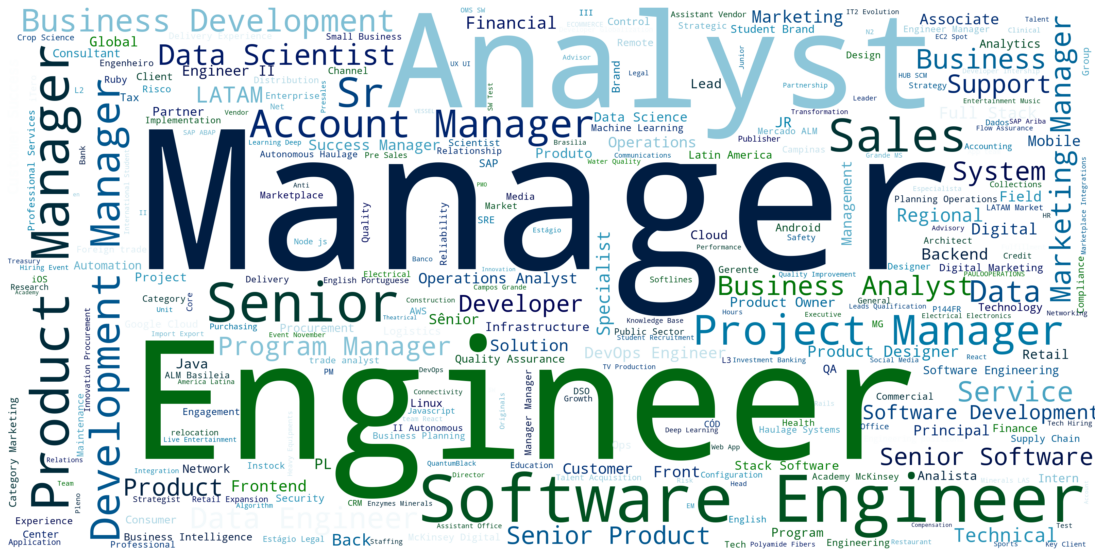

In [37]:
# Create stopword list:
stopwords_title = set(STOPWORDS)
stopwords_title.update(['company','end','day','one','well','Brazil', 'Sao', 'São', 'Paulo','area','make','within',
                        'areas','based','plus','site','time','part','best','meet','must','new','etc','Territory',
                        'SP', 'RJ', 'Rio', 'de','Janeiro', 'PE', 'Recife', 'PR', 'RS', 'CASCAVEL', 'Porto', 'Alegre', 
                        'St', 'Louis'])

# Generate a word cloud image
wordcloud_title = WordCloud(stopwords=stopwords_title, max_words=300, background_color="white", 
                      scale=2, width=1600, height=800, colormap="ocean").generate(text_title)

# Display the generated image:
plt.figure(figsize=(20,10))#, facecolor='lightblue')
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis("off")

# Store to file
#plt.savefig("job_titles.png", format="png")

plt.show()

### Job descriptions

In [38]:
text_desc = " ".join(description for description in data_c['job.description'])
print("There are {} words in the combination of all job description.".format(len(text_desc)))

There are 4765689 words in the combination of all job description.


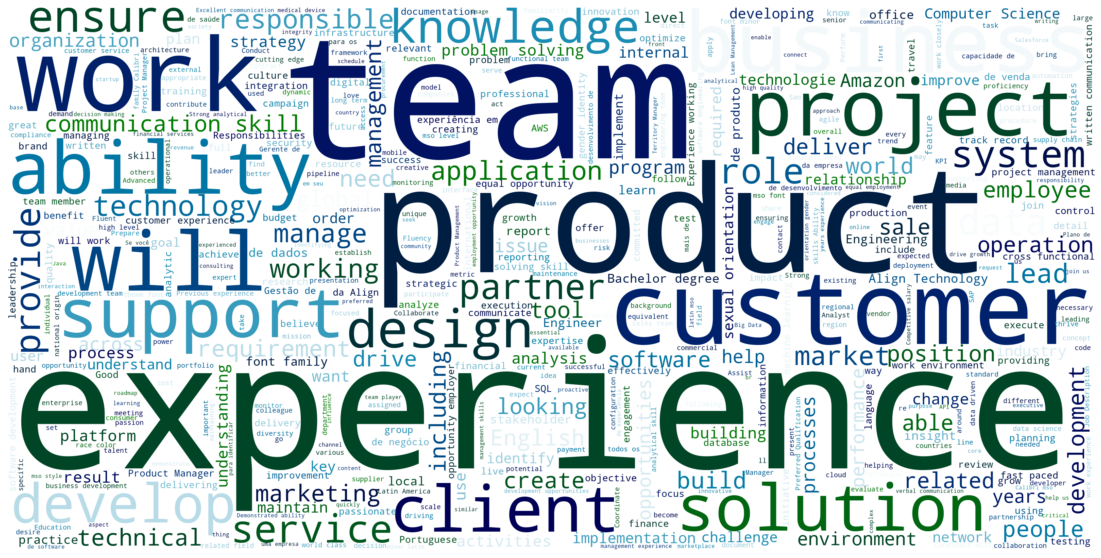

In [39]:
# Create stopword list:
stopwords_desc = set(STOPWORDS)
stopwords_desc.update(['company','end','day','one','well','Brazil','São', 'Paulo','area','make','within',
                       'areas','based','plus','site','time','part','best','meet','must','new','etc', 'year'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords_desc, max_words=500, background_color="white", 
                      scale=2, width=1600, height=800, colormap="ocean").generate(text_desc)

# Display the generated image:
plt.figure(figsize=(20,10))#, facecolor='lightblue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Store to file
#plt.savefig("job_descriptions.png", format="png")

plt.show()

### Company overview

In [40]:
text_overview = " ".join(str(overview) for overview in data_c['overview.description'])
print("There are {} words in the combination of all overview description.".format(len(text_overview)))

There are 516094 words in the combination of all overview description.


In [41]:
text_overview[:10]

'nan nan SA'

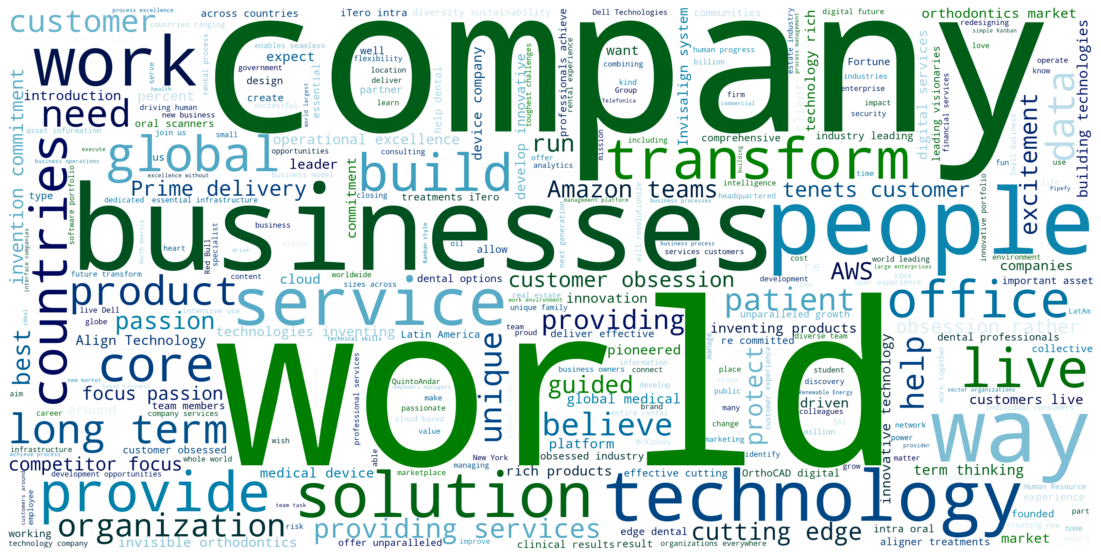

In [42]:
# Create stopword list:
stopwords_overview = set(STOPWORDS)
stopwords_overview.update(['nan','Today', 'four', 'key', 'one', 'end', 'São', 'Paulo'])

# Generate a word cloud image
wordcloud_overview = WordCloud(stopwords=stopwords_overview, max_words=300, background_color="white", 
                      scale=2, width=1600, height=800, colormap="ocean").generate(text_overview)

# Display the generated image:
plt.figure(figsize=(20,10))#, facecolor='lightblue')
plt.imshow(wordcloud_overview, interpolation='bilinear')
plt.axis("off")

# Store to file
#plt.savefig("company_overview.png", format="png")

plt.show()

## Appendix: variables
[Return to Table of Contents](#Table-of-Contents)

**Description of each column:**

| Variables | Description | Data type |  
|:---|:---|:---|
| header.employerName | Employer Name | Nominal |
| header.jobTitle | Job Title | Nominal |
| header.location | Location City (most of times) | Nominal|
| header.posted | Date job was posted | Ordinal|
| header.rating | Company rating by employees | Continuous |
| header.sponsored | If job listing was sponsored | Boolean |
| job.description | Job description in HTML | Text |
| map.lat | Latitude | Continuous |
| map.lng| Longitude | Continuous |
| overview.foundedYear| Company foundation year | Discrete |
| overview.hq| Company Headquarters | Nominal |
| overview.industry| Company Industry | Nominal |
| overview.revenue| Company Revenue | Continuous |
| overview.sector| Company Sector | Nominal |
| overview.sectorId| Company Sector Id | Discrete |
| overview.size| Company Size | Discrete |
| overview.type| Company Type | Nominal |
| overview.description| Company Description | Text |
| overview.website| Website address | Text |
| rating.ceo.name| CEO Name | Nominal |
| rating.ceoApproval| CEO Rating | Continuous |
| rating.recommendToFriend| Recommendation Rating | Continuous |
| rating.starRating| Company Rating | Continuous |
| reviews| Number of reviews | Discrete |
| salary.salaries| Salary in pounds | Continuous |


In [43]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 375 to 164945
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   header.employerName       1423 non-null   object 
 1   header.jobTitle           1423 non-null   object 
 2   header.location           1423 non-null   object 
 3   header.posted             1423 non-null   object 
 4   header.rating             1423 non-null   float64
 5   header.sponsored          1423 non-null   bool   
 6   job.description           1423 non-null   object 
 7   map.lat                   1423 non-null   float64
 8   map.lng                   1423 non-null   float64
 9   overview.foundedYear      1423 non-null   int64  
 10  overview.hq               1211 non-null   object 
 11  overview.industry         1035 non-null   object 
 12  overview.revenue          1293 non-null   object 
 13  overview.sector           1035 non-null   object 
 14  over